In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('../iniadMaterial/2021/dm-0102/covid-19-pref-area-20200403.csv', delimiter=',', skiprows=7, header=0)
print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


,Pref,Pop(100k),Infected,Discharged,PCR,Area
0,Hokkaido,53.2,190,130,2803,Hokkaido
1,Aomori,12.8,11,0,249,Tohoku
2,Iwate,12.6,0,0,69,Tohoku
3,Miyagi,23.2,13,1,479,Tohoku
4,Akita,10.0,9,2,358,Tohoku


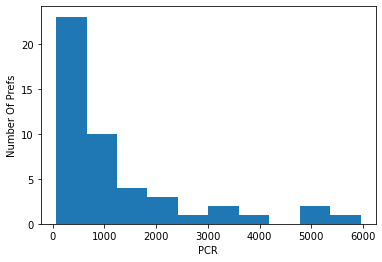

In [3]:
ser_aclose = df['PCR']
plt.hist(ser_aclose, bins=10)
plt.xlabel('PCR')
plt.ylabel('Number Of Prefs')
plt.show()

,Infected,Discharged
0,190,130
1,11,0
2,0,0
3,13,1
4,9,2


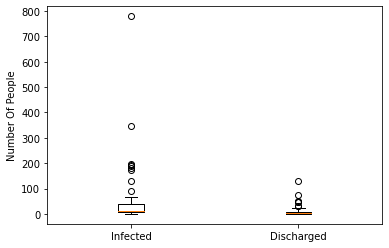

In [4]:
df_box_plot = df.loc[:, ['Infected', 'Discharged']]
display(df_box_plot.head())
plt.boxplot(df_box_plot.values)
plt.xticks(range(1,df_box_plot.shape[1]+1),df_box_plot.columns)  # set xticklabels to columns
plt.ylabel('Number Of People')
plt.show()


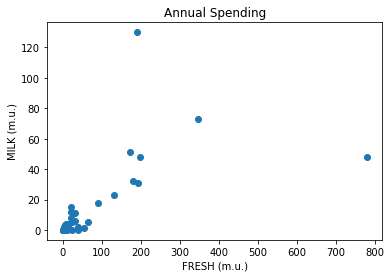

In [5]:
ser_infected = df['Infected']
ser_discharged = df['Discharged']
plt.scatter(ser_infected, ser_discharged, marker='o')
plt.title('Annual Spending')
plt.xlabel('FRESH (m.u.)')
plt.ylabel('MILK (m.u.)')
plt.show()

Area
Chubu        359
Chugoku       24
Hokkaido     190
Kanto       1384
Kinki        678
Kyushu       140
Shikoku       37
Tohoku        43
Name: Infected, dtype: int64

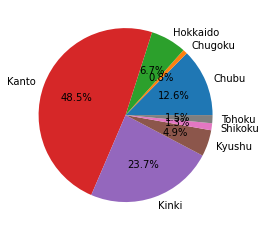

In [6]:
df_area = df.groupby('Area').sum()
df_area_infected = df_area['Infected']
display(df_area_infected)
plt.pie(df_area_infected, autopct="%.1f%%", labels=df_area.index)
plt.show()


,Pop(100k),Infected,Discharged,PCR,Infected_per_100k
Area,,,,,
Chubu,205.5,359,73,8441,1.746959
Chugoku,73.7,24,4,2690,0.325645
Hokkaido,53.2,190,130,2803,3.571429
Kanto,440.7,1384,140,20122,3.140458
Kinki,224.2,678,172,13730,3.024086


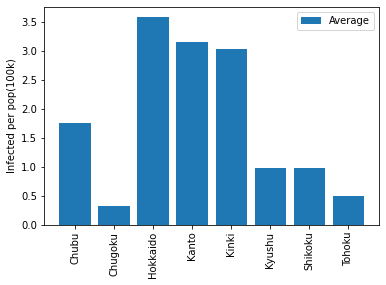

In [7]:
df_area['Infected_per_100k'] = df_area['Infected'] / df_area['Pop(100k)']
display(df_area.head())
ser_infected_per_100k = df_area['Infected_per_100k']
plt.bar(ser_infected_per_100k.index, ser_infected_per_100k, label='Average')
plt.ylabel('Infected per pop(100k)')
plt.xticks(rotation=90)
plt.legend()
plt.show()



In [8]:
df_jpn = pd.read_csv('../iniadMaterial/2021/dm-0102/covid-19-japan-20200407.csv', delimiter=',', skiprows=0, header=0)
print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

(57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          57 non-null     object
 1   Infected_day  57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


In [9]:
df_jpn['Date'] = pd.to_datetime(df_jpn['Date'], format='%Y-%m-%d')
print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

(57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   Infected_day  57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


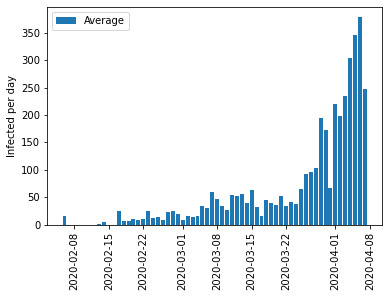

In [10]:
ser_infected_by_day = df_jpn.set_index(df_jpn['Date'])['Infected_day']
plt.bar(ser_infected_by_day.index, ser_infected_by_day, label='Average')
plt.ylabel('Infected per day')
plt.xticks(rotation=90)
plt.legend()
plt.show()

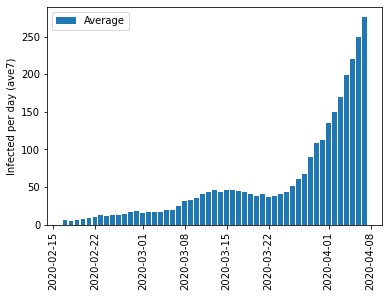

In [11]:
ser_infected_per_7_day = ser_infected_by_day.rolling(window=7).mean()
plt.bar(ser_infected_per_7_day.index, ser_infected_per_7_day, label='Average')
plt.ylabel('Infected per day (ave7)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

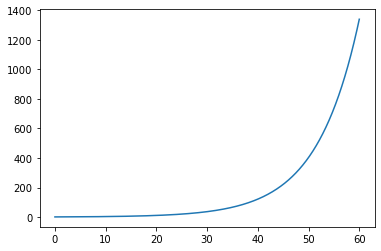

In [12]:
x = np.linspace(0, 60, num=2000)
y = np.exp(0.12*x)
plt.plot(x, y)
plt.show()